In [91]:
# we first import our models that we are going to work with.
import pandas as pd   # for data manipulation
import numpy as np   # for working with arrays
import matplotlib.pyplot as plt  # for visualization purposes
import seaborn as sns      # supports matplotlib in rendering good and beautiful charts.
sns.set()
import statsmodels as sm   # contains good statistical tools for modeling
from statsmodels.stats.outliers_influence import variance_inflation_factor  # we will need vif for checking multicollinearity
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV  # for data splitting and parameter tuning
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso  # linear regression models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor  # enables us to perform regression using a decision tree
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor  # ensemble methods for regression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import r2_score,mean_squared_error   # for scoring the model and calculating the mean squared error

from sklearn import preprocessing  # for data preprocessing and scaling

# Adding a constant variable
import statsmodels.api as sm

import warnings

warnings.filterwarnings('ignore')

In [92]:
# Import Excel data into pandas
greeks_data=pd.read_csv("greeks.csv")
greeks_data


,Id,Alpha,Beta,Gamma,Delta,Epsilon
0,000ff2bfdfe9,B,C,G,D,3/19/2019
1,007255e47698,A,C,M,B,Unknown
2,013f2bd269f5,A,C,M,B,Unknown
3,043ac50845d5,A,C,M,B,Unknown
4,044fb8a146ec,D,B,F,B,3/25/2020
...,...,...,...,...,...,...
612,fd3dafe738fd,A,B,M,B,9/13/2020
613,fd895603f071,A,B,M,B,9/8/2020
614,fd8ef6377f76,A,C,M,B,7/24/2019
615,fe1942975e40,A,C,M,B,1/31/2019


In [93]:
# Import train data
train_data= pd.read_csv("train.csv")
data= train_data.round(2)
data

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.21,3109.03,85.20,22.39,8.14,0.70,0.03,9.81,5.56,...,7.30,1.74,0.09,11.34,72.61,2003.81,22.14,69.83,0.12,1
1,007255e47698,0.15,978.76,85.20,36.97,8.14,3.63,0.03,13.52,1.23,...,0.17,0.50,0.57,9.29,72.61,27981.56,29.14,32.13,21.98,0
2,013f2bd269f5,0.47,2635.11,85.20,32.36,8.14,6.73,0.03,12.82,1.23,...,7.71,0.98,1.20,37.08,88.61,13676.96,28.02,35.19,0.20,0
3,043ac50845d5,0.25,3819.65,120.20,77.11,8.14,3.69,0.03,11.05,1.23,...,6.12,0.50,0.28,18.53,82.42,2094.26,39.95,90.49,0.16,0
4,044fb8a146ec,0.38,3733.05,85.20,14.10,8.14,3.94,0.05,3.40,102.15,...,8.15,48.50,0.12,16.41,146.11,8524.37,45.38,36.26,0.10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,fd3dafe738fd,0.15,3130.06,123.76,9.51,13.02,3.50,0.08,8.55,2.80,...,0.17,1.26,0.07,8.97,217.15,8095.93,24.64,69.19,21.98,0
613,fd895603f071,0.44,5462.03,85.20,46.55,15.97,5.98,0.03,12.62,3.78,...,10.22,1.24,0.43,35.90,496.99,3085.31,29.65,124.81,0.15,0
614,fd8ef6377f76,0.43,2459.11,130.14,55.36,10.01,8.07,0.03,15.41,1.23,...,0.17,0.50,0.07,19.96,128.90,6474.65,26.17,119.56,21.98,0
615,fe1942975e40,0.36,1263.54,85.20,23.69,8.14,7.98,0.03,7.52,1.23,...,9.26,0.79,0.67,24.59,72.61,1965.34,25.12,37.16,0.18,0


In [94]:
# Import train data
test_data= pd.read_csv("test.csv")
df_test= test_data.round(2)
df_test

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,00eed32682bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,010ebe33f668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,02fa521e1838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,040e15f562a2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,046e85c7cc7f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
data.shape # display the shape of the data

(617, 58)

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

In [97]:
data.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,...,616.000000,617.000000,615.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000,617.000000
mean,0.477196,3502.012950,118.624506,38.968622,10.129238,5.545575,0.063404,10.566872,8.053096,5350.388493,...,5.432078,3.534652,0.422228,20.724862,131.714327,14679.595122,31.489919,50.584311,8.531656,0.175041
std,0.468481,2300.322759,127.838882,69.728384,10.518445,2.551590,0.416742,4.350082,65.166756,3021.326729,...,11.496607,50.182020,1.305354,9.991997,144.181678,19352.959482,9.864329,36.266154,10.328017,0.380310
min,0.080000,192.590000,85.200000,3.180000,8.140000,0.700000,0.030000,3.400000,1.230000,1693.620000,...,0.170000,0.500000,0.070000,4.100000,72.610000,13.040000,9.430000,0.900000,0.000000,0.000000
25%,0.250000,2197.350000,85.200000,12.270000,8.140000,4.130000,0.030000,8.130000,1.230000,4155.700000,...,0.170000,0.500000,0.070000,14.040000,72.610000,2798.990000,25.030000,23.010000,0.120000,0.000000
50%,0.350000,3120.320000,85.200000,20.530000,8.140000,5.030000,0.030000,10.460000,1.230000,4997.960000,...,3.030000,1.130000,0.250000,18.770000,72.610000,7838.270000,30.610000,41.010000,0.340000,0.000000
75%,0.560000,4361.640000,113.740000,39.140000,8.140000,6.430000,0.040000,12.970000,5.080000,6035.890000,...,6.240000,1.510000,0.540000,25.610000,127.590000,19035.710000,36.860000,67.930000,21.980000,0.000000
max,6.160000,28688.190000,1910.120000,630.520000,178.940000,38.270000,10.320000,38.970000,1463.690000,53060.600000,...,137.930000,1244.230000,31.370000,135.780000,1497.350000,143790.070000,81.210000,191.190000,21.980000,1.000000


In [98]:
# Checking duplicate values
print('Sum of duplicate values:{}\n'.format(data.duplicated().sum()))

Sum of duplicate values:0



In [99]:
data['EJ'].value_counts()

B    395
A    222
Name: EJ, dtype: int64

In [100]:
m=[col for col in data.columns if data[col].isna().sum()!=0]
print(m)

['BQ', 'CB', 'CC', 'DU', 'EL', 'FC', 'FL', 'FS', 'GL']


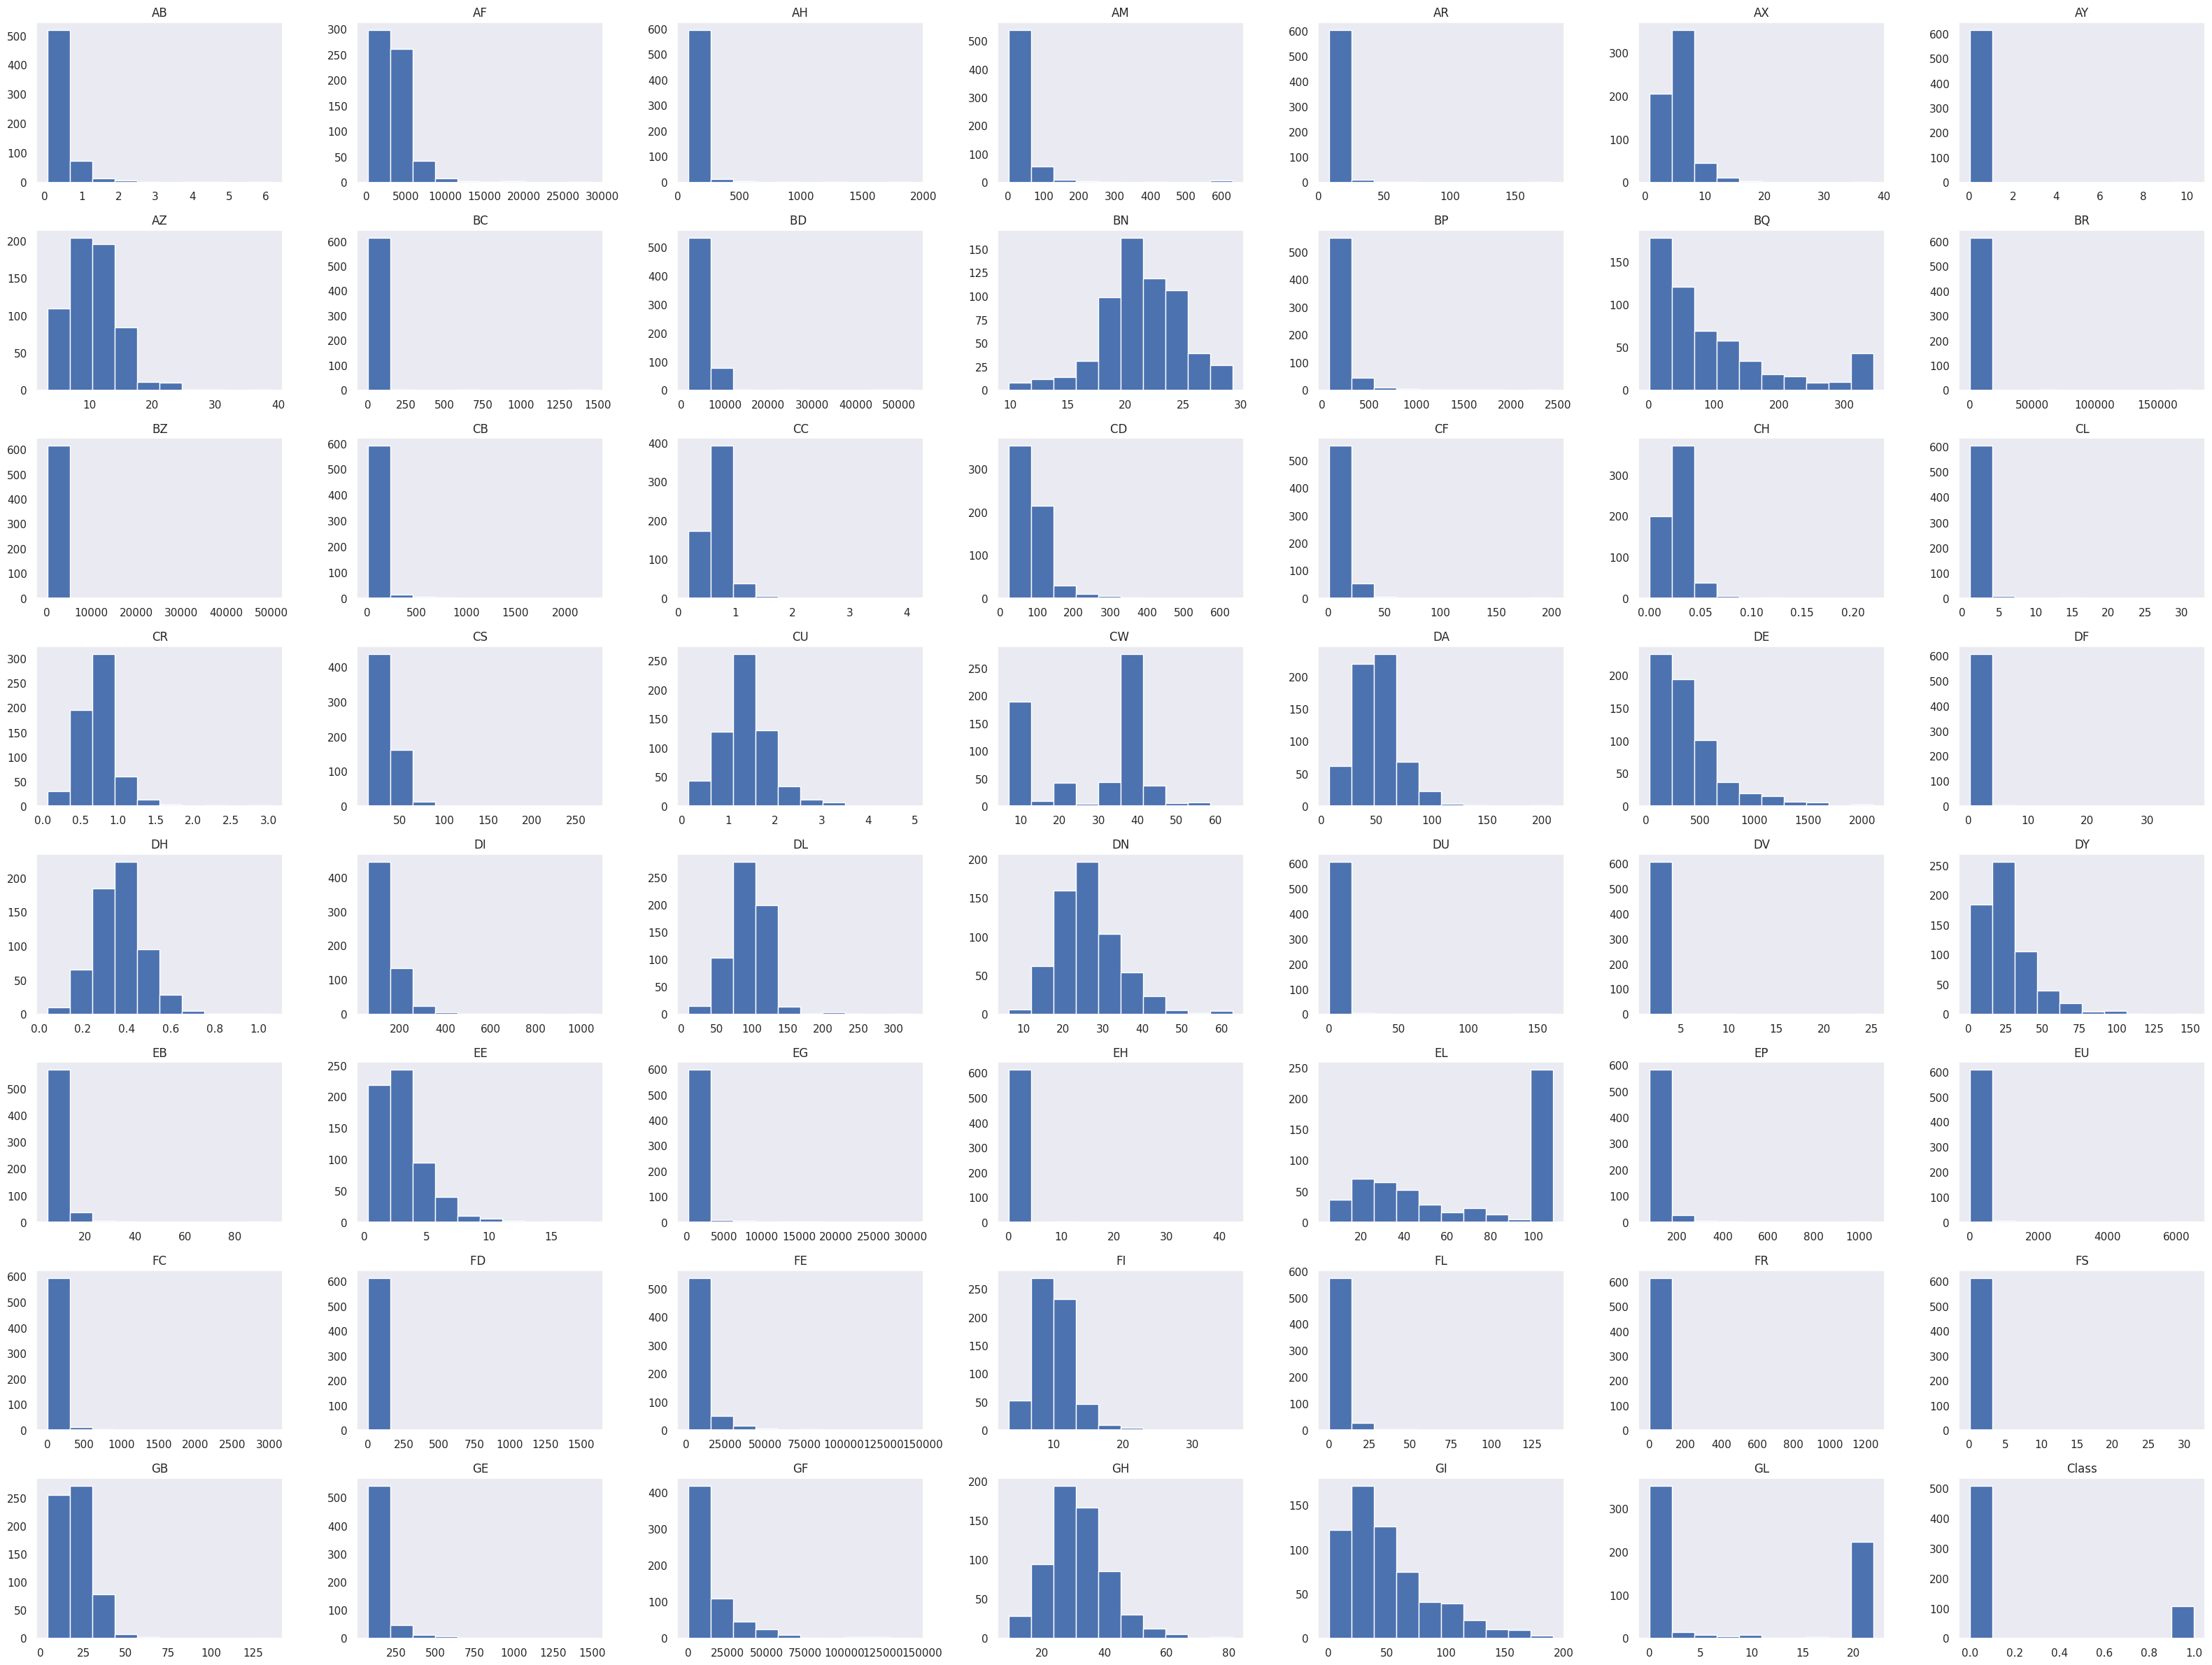

In [101]:
# let's visualize the distribution of the features
data.hist(figsize=(40,30),bins=10, grid=False)
plt.show()

In [102]:
# Replaced the na with median as the attributes are distributed either left or right skewed.
data['BQ'] = data['BQ'].fillna(data['BQ'].median())
data['CB'] = data['CB'].fillna(data['CB'].median())
data['CC'] = data['CC'].fillna(data['CC'].median())
data['DU'] = data['DU'].fillna(data['DU'].median())
data['EL'] = data['EL'].fillna(data['EL'].median())
data['FC'] = data['FC'].fillna(data['FC'].median())
data['FL'] = data['FL'].fillna(data['FL'].median())
data['FS'] = data['FS'].fillna(data['FS'].median())
data['GL'] = data['GL'].fillna(data['GL'].median())

In [103]:
m=[col for col in df_test.columns if df_test[col].isna().sum()!=0]
print(m)

[]


In [104]:
# Replaced the na values of test data with median as the attributes are distributed either left or right skewed.
df_test['BQ'] = df_test['BQ'].fillna(data['BQ'].median())
df_test['CB'] = df_test['CB'].fillna(data['CB'].median())
df_test['CC'] = df_test['CC'].fillna(data['CC'].median())
df_test['DU'] = df_test['DU'].fillna(data['DU'].median())
df_test['EL'] = df_test['EL'].fillna(data['EL'].median())
df_test['FC'] = df_test['FC'].fillna(data['FC'].median())
df_test['FL'] = df_test['FL'].fillna(data['FL'].median())
df_test['FS'] = df_test['FS'].fillna(data['FS'].median())
df_test['GL'] = df_test['GL'].fillna(data['GL'].median())

In [105]:
sns.set(rc={"figure.figsize":(15, 15)})

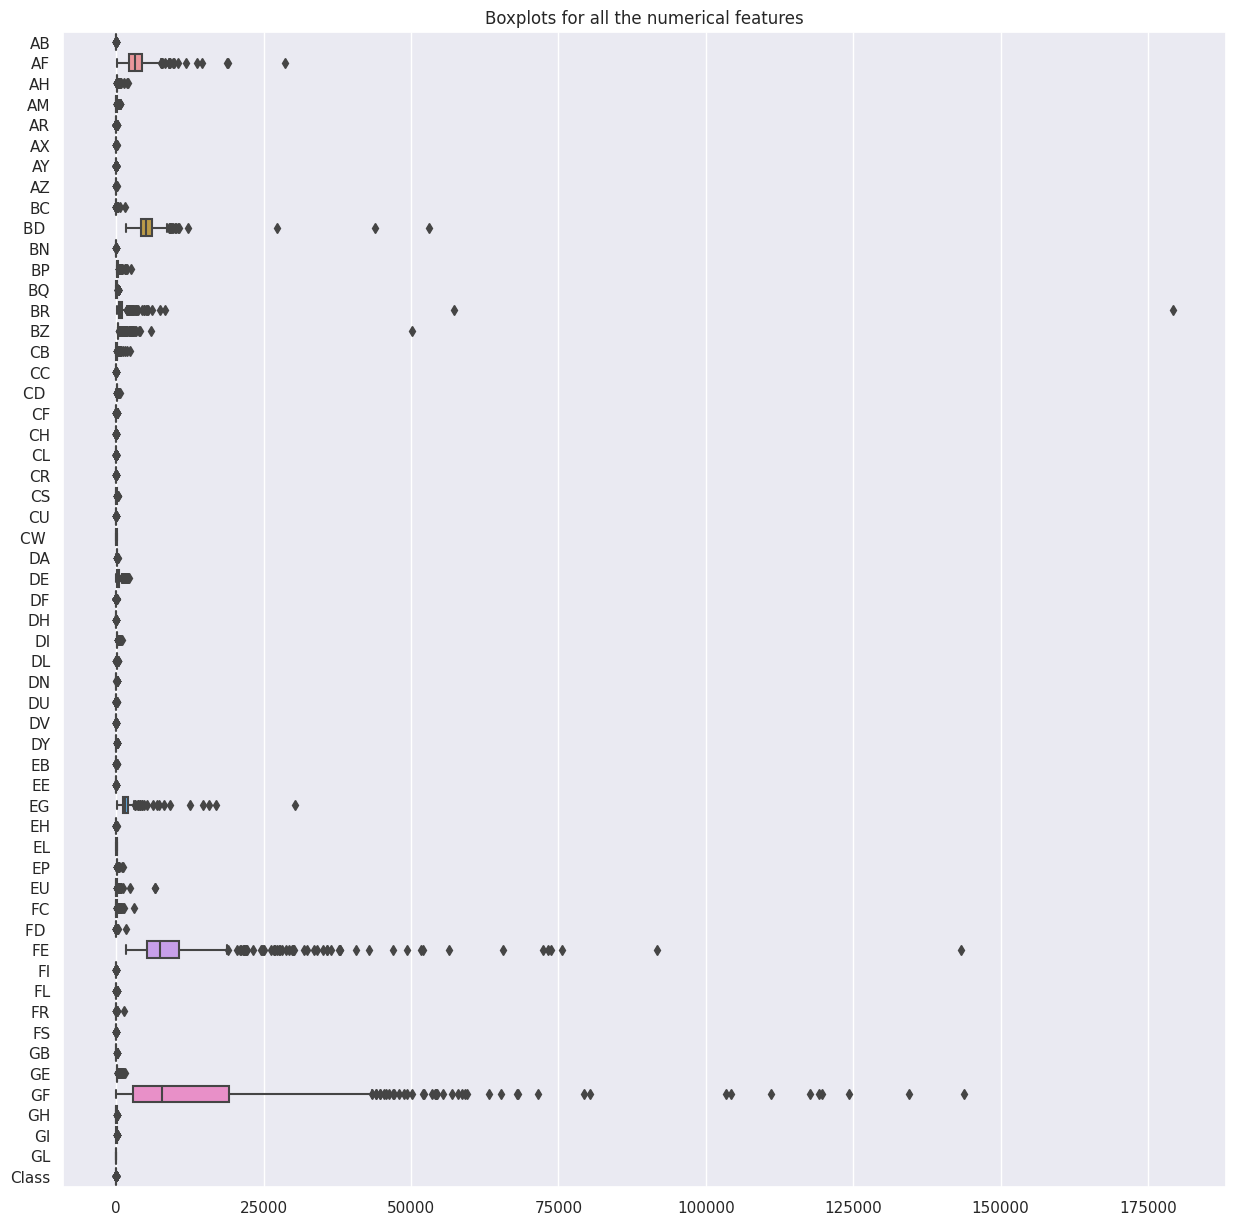

In [106]:
# let's visualize the boxplot for each of the numerical attributes
sns.boxplot(data=data, orient="h")
sns.set(rc={"figure.figsize":(15, 15)})
# Display
plt.title("Boxplots for all the numerical features")
plt.show()


In [107]:
sns.set(rc={"figure.figsize":(4,4)})

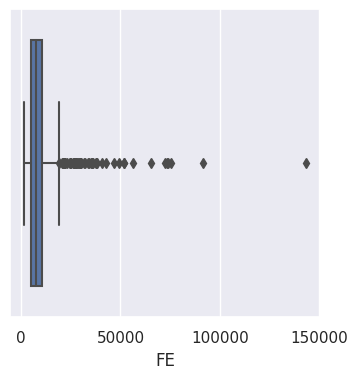

In [108]:
sns.boxplot(data = data, x = 'FE')
sns.set(rc={"figure.figsize":(3,4)})
# Display
plt.show()

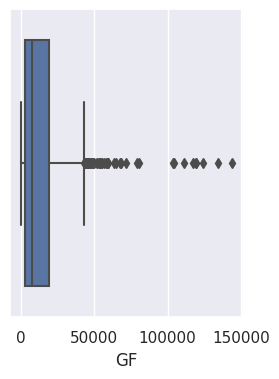

In [109]:
sns.boxplot(data = data, x = 'GF')
sns.set(rc={"figure.figsize":(4, 4)})
# Display
plt.show()

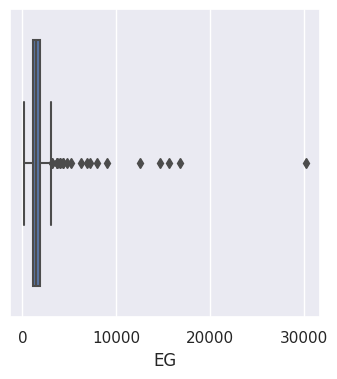

In [110]:

sns.boxplot(data = data, x = 'EG')
sns.set(rc={"figure.figsize":(5, 4)})
# Display
plt.show()

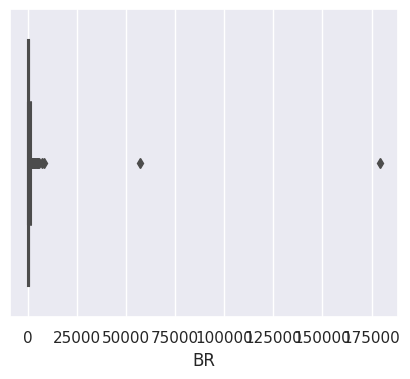

In [111]:
sns.boxplot(data = data, x = 'BR')
#sns.set(rc={"figure.figsize":(5,5)})
# Display
plt.show()


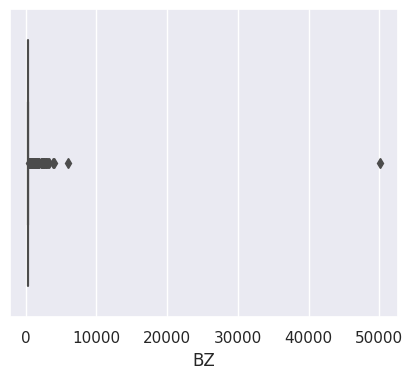

In [112]:
sns.boxplot(data = data, x = 'BZ',)
#sns.set(rc={"figure.figsize":(5,3)})
# Display
plt.show()

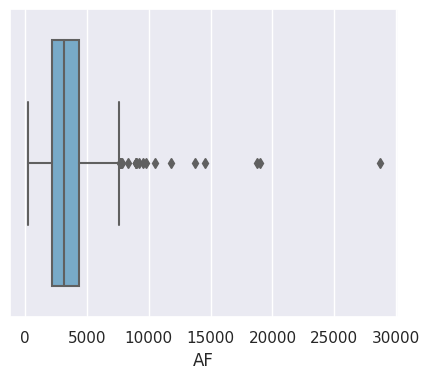

In [113]:
sns.boxplot(data = data, x = 'AF', palette="Blues")
#sns.set(rc={"figure.figsize":(6,3)})
# Display
plt.show()


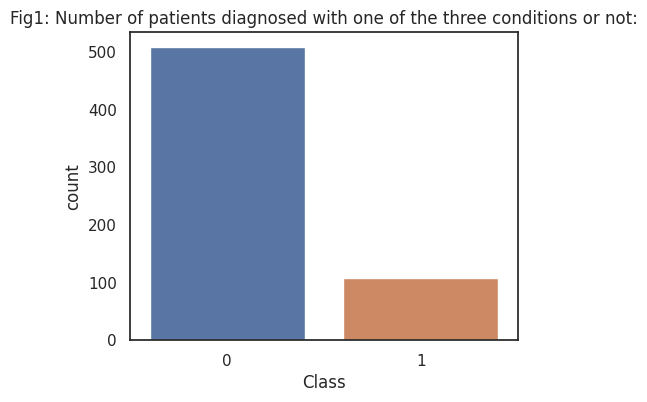

In [114]:
sns.set_style("white")
sns.countplot(x=data['Class'])
plt.title("Fig1: Number of patients diagnosed with one of the three conditions or not:" )
plt.show()

In [115]:
data['Class'].value_counts()

0    509
1    108
Name: Class, dtype: int64

In [116]:
# To check the Outliers in Class as 1
data1=data.loc[data['Class']==1]

data1.shape

(108, 58)

In [117]:
sns.set(rc={"figure.figsize":(15, 15)})

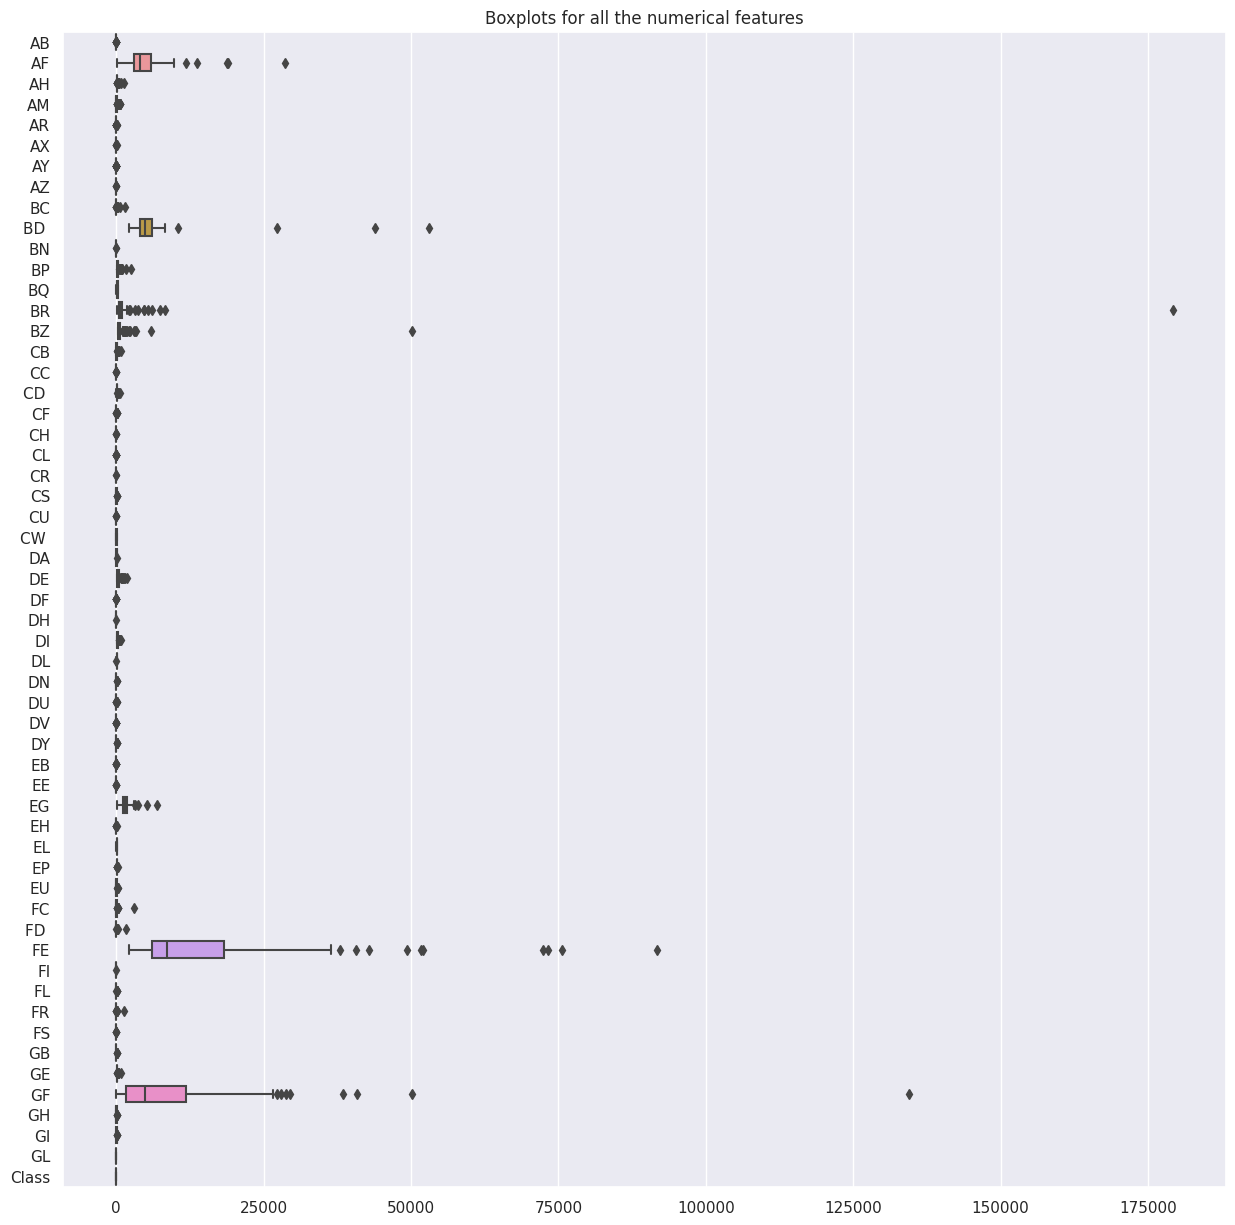

In [118]:
# let's visualize the boxplot for each of the numerical attributes
sns.boxplot(data=data1, orient="h")
sns.set(rc={"figure.figsize":(15, 15)})
# Display
plt.title("Boxplots for all the numerical features")
plt.show()

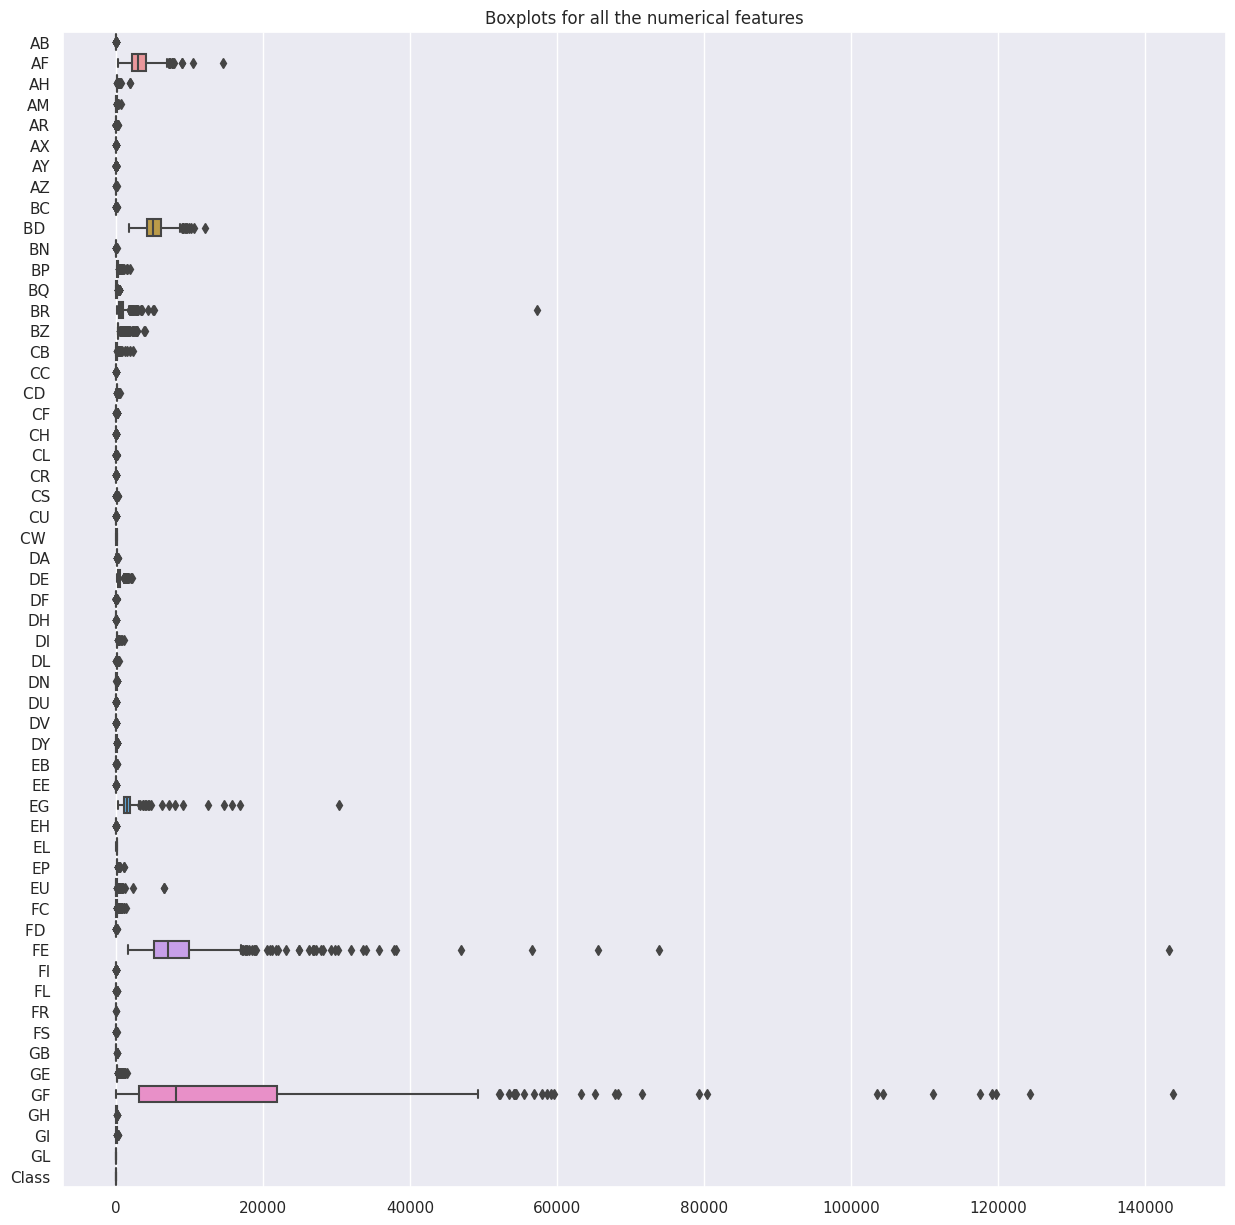

In [119]:
# To check the Outliers in Class as 0
data0=data.loc[data['Class']==0]
data0.shape
# let's visualize the boxplot for each of the numerical attributes
sns.boxplot(data=data0, orient="h")
sns.set(rc={"figure.figsize":(14, 15)})
# Display
plt.title("Boxplots for all the numerical features")
plt.show()


In [175]:
sns.set(rc={"figure.figsize":(5, 5)})

**Label Encoding for ED in Train data**

In [121]:
c = data.EJ.astype('category')

EJ_dict = dict(enumerate(c.cat.categories))

data['EJ'] = data.EJ.astype('category').cat.codes

data['EJ_OLD'] = data['EJ'].map(EJ_dict)
print (data)

               Id    AB       AF      AH      AM     AR    AX    AY     AZ  \
0    000ff2bfdfe9  0.21  3109.03   85.20   22.39   8.14  0.70  0.03   9.81   
1    007255e47698  0.15   978.76   85.20   36.97   8.14  3.63  0.03  13.52   
2    013f2bd269f5  0.47  2635.11   85.20   32.36   8.14  6.73  0.03  12.82   
3    043ac50845d5  0.25  3819.65  120.20   77.11   8.14  3.69  0.03  11.05   
4    044fb8a146ec  0.38  3733.05   85.20   14.10   8.14  3.94  0.05   3.40   
..            ...   ...      ...     ...     ...    ...   ...   ...    ...   
612  fd3dafe738fd  0.15  3130.06  123.76    9.51  13.02  3.50  0.08   8.55   
613  fd895603f071  0.44  5462.03   85.20   46.55  15.97  5.98  0.03  12.62   
614  fd8ef6377f76  0.43  2459.11  130.14   55.36  10.01  8.07  0.03  15.41   
615  fe1942975e40  0.36  1263.54   85.20   23.69   8.14  7.98  0.03   7.52   
616  ffcca4ded3bb  0.48  2672.53  546.66  112.01   8.14  3.20  0.12   3.40   

         BC  ...     FR    FS     GB      GE        GF     GH  

In [122]:
# subset all categorical variables
df_categorical = data.select_dtypes(include=['object', 'datetime64[ns]'])
df_categorical.head()

,Id,EJ_OLD
0,000ff2bfdfe9,B
1,007255e47698,A
2,013f2bd269f5,B
3,043ac50845d5,B
4,044fb8a146ec,B


In [123]:
data=data.drop(['EJ_OLD'], axis=1)

In [124]:
data=data.drop(['Id'], axis=1)

**Label Encoding for the Test data**




In [125]:
c = df_test.EJ.astype('category')

EJ_dict = dict(enumerate(c.cat.categories))

df_test['EJ'] = df_test.EJ.astype('category').cat.codes

df_test['EJ_OLD'] = df_test['EJ'].map(EJ_dict)
print (df_test)

             Id   AB   AF   AH   AM   AR   AX   AY   AZ   BC  ...   FL   FR  \
0  00eed32682bb  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1  010ebe33f668  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2  02fa521e1838  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3  040e15f562a2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
4  046e85c7cc7f  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

    FS   GB   GE   GF   GH   GI   GL  EJ_OLD  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       A  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0       A  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0       A  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0       A  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0       A  

[5 rows x 58 columns]


In [126]:
x_test=df_test.drop(['EJ_OLD'], axis=1)

In [127]:
test=x_test.drop(['Id'], axis=1)

**Modeling Preparation**

In [128]:
# Modeling Preparation
y = data['Class']
x = data.drop(['Class'], axis = 1)


In [129]:
# Checking the shape of the data
data.shape

(617, 57)

In [130]:
# Checking the value counts of class features
data.Class.value_counts()

0    509
1    108
Name: Class, dtype: int64

In [131]:
# Split data into test and train using stratify split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42, stratify=y)

In [132]:
# Standard scaling on features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# Scaling the test and train data that we split using train test split function
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)
# Scaling the actual test data
df_test_array = sc.transform(test.values)
test = pd.DataFrame(df_test_array, index= test.index, columns= test.columns)

In [133]:
#pip install -U imbalanced-learn

In [134]:
print("Before OverSampling, counts of Class '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of Class '0': {} \n".format(sum(y_train == 0)))


Before OverSampling, counts of Class '1': 75
Before OverSampling, counts of Class '0': 356 



In [135]:
# import SMOTE module from imblearn library
# pip3 install imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
x_train, y_train = sm.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(x_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print("After OverSampling, counts of Class label as '1': {}".format(sum(y_train == 1)))
print("After OverSampling, counts of Class label as '0': {}".format(sum(y_train == 0)))

After OverSampling, the shape of train_X: (712, 56)
After OverSampling, the shape of train_y: (712,) 

After OverSampling, counts of Class label as '1': 356
After OverSampling, counts of Class label as '0': 356


**Gradient Boosting Classifier**

In [136]:
gbclass = xgb.XGBClassifier(
    objective="binary:logistic",
    random_state=42
)
gbclass= gbclass.fit(x_train, y_train)

In [137]:
gbypred= gbclass.predict(x_test)

In [138]:
gbclass.score(x_test, y_test)

0.9139784946236559

In [139]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, gbclass.predict(x_test)))
from sklearn.metrics import log_loss
logloss = log_loss(y_test, gbclass.predict_proba(x_test))
print("logloss: ",round(logloss,2))
f1= f1_score(y_test,gbclass.predict(x_test), average='binary')
print("F1-Score: ", f1)
print('Precision: %.3f' % precision_score(y_test, gbypred))
print('Recall: %.3f' % recall_score(y_test, gbypred))
mse = mean_squared_error(y_test, gbypred)
print('MSE: %.3f' % mse)

Accuracy: 0.914
logloss:  0.19
F1-Score:  0.7647058823529412
Precision: 0.743
Recall: 0.788
MSE: 0.086


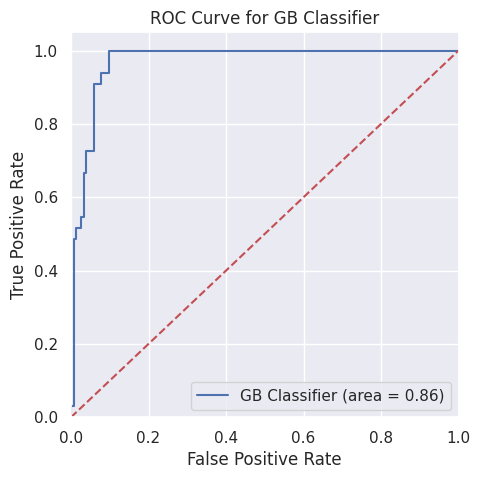

In [140]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, gbypred)
fpr, tpr, thresholds = roc_curve(y_test, gbclass.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='GB Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for GB Classifier')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

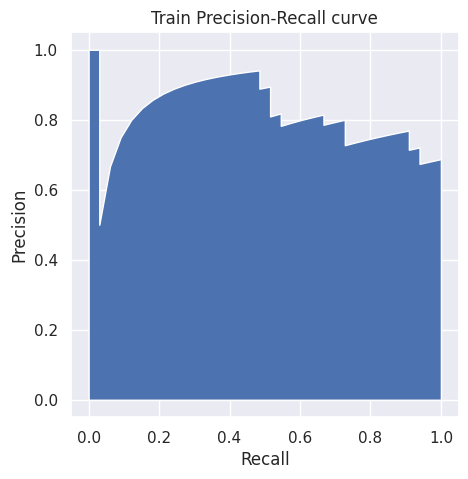

In [141]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, gbclass.predict_proba(x_test)[:,1])
plt.fill_between(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve");

**Hyper parameter tuning for XGBoost Classifier**

In [142]:
import xgboost as xgb
# Using Stratified K fold CV
from sklearn.model_selection import StratifiedKFold
folds= StratifiedKFold(n_splits=4, random_state=42, shuffle=True)
params = { 'max_depth': [ 6, 10, 15, 20],
           'learning_rate': [0.25, 0.1, 0.2],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [500, 1000]}
kfolds= StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
xgbr = xgb.XGBClassifier(seed = 20, objective="binary:logistic",
    random_state=42)
clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         cv= kfolds,
                         n_iter=100,
                         verbose=1,
                         random_state=42)
clf.fit(x_train, y_train)
print("Best parameters:", clf.best_params_)



#{'subsample': 0.7, 'n_estimators': 100, 'max_depth': 15, 'learning_rate': 0.3, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.7}


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'subsample': 0.7, 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.25, 'colsample_bytree': 0.4, 'colsample_bylevel': 0.6}


In [143]:
# Using Stratified K fold CV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
kf=KFold(n_splits=5)
kfolds= StratifiedKFold(n_splits=4, random_state=42, shuffle=True)

In [171]:
final_cl = xgb.XGBClassifier(
    subsample=0.7,
    n_estimators= 1000,
    max_depth= 10,
    learning_rate= 0.25,
    colsample_bytree= 0.4,
    colsample_bylevel= 0.6,
    objective="binary:logistic",
    random_state=42
)
model_xgb= final_cl.fit(x_train, y_train)

In [172]:
# Final Parameters
final_cl = xgb.XGBClassifier(
    subsample=0.6,
    n_estimators= 500,
    max_depth= 8,
    learning_rate= 0.1,
    colsample_bytree= 0.89,
    colsample_bylevel= 0.4,
    objective="binary:logistic",
    random_state=42
)
model_xgb= final_cl.fit(x_train, y_train)

In [173]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, model_xgb.predict(x_test)))
from sklearn.metrics import log_loss
logloss = log_loss(y_test, model_xgb.predict_proba(x_test))
print("logloss: ",round(logloss,2))
f1= f1_score(y_test,model_xgb.predict(x_test), average='binary')
print("F1-Score: ", f1)
print('Precision: %.3f' % precision_score(y_test, model_xgb.predict(x_test)))
print('Recall: %.3f' % recall_score(y_test,  model_xgb.predict(x_test)))
mse = mean_squared_error(y_test,  model_xgb.predict(x_test))
print('MSE: %.3f' % mse)

Accuracy: 0.941
logloss:  0.15
F1-Score:  0.8358208955223881
Precision: 0.824
Recall: 0.848
MSE: 0.059


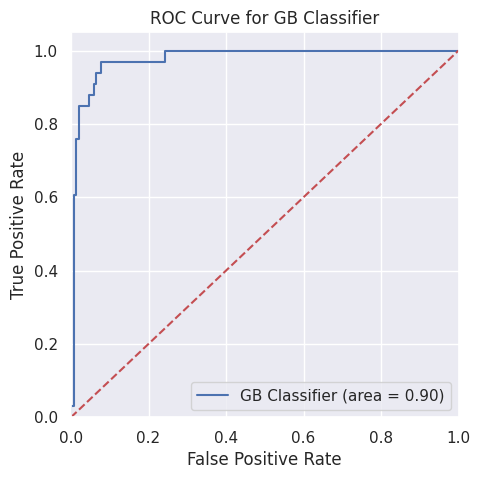

In [176]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model_xgb.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model_xgb.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='GB Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for GB Classifier')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

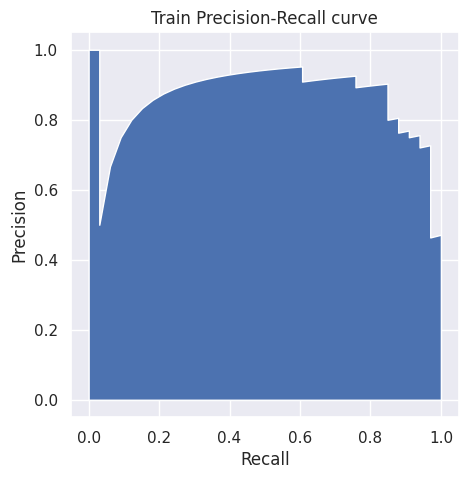

In [177]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, model_xgb.predict_proba(x_test)[:,1])
plt.fill_between(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve");

In [178]:
model_xgb.predict_proba(test)

array([[0.96535707, 0.03464292],
       [0.96535707, 0.03464292],
       [0.96535707, 0.03464292],
       [0.96535707, 0.03464292],
       [0.96535707, 0.03464292]], dtype=float32)

Text(0.5, 0, 'XGBoost Feature Importance')

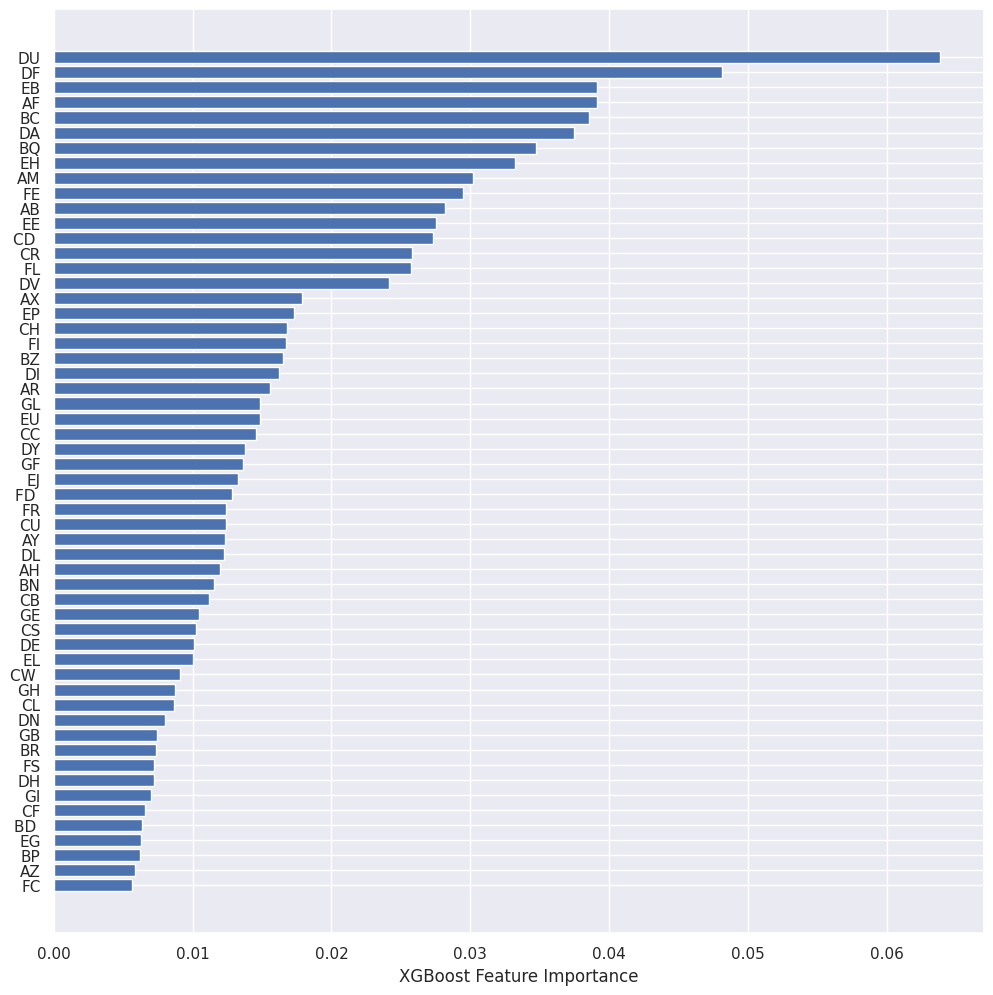

In [179]:
sorted_idx = model_xgb.feature_importances_.argsort()
sns.set(rc={"figure.figsize":(12, 12)})
plt.barh(x.columns[sorted_idx], model_xgb.feature_importances_[sorted_idx])
plt.xlabel("XGBoost Feature Importance")

In [180]:
# Fit model using each importance as a threshold
from numpy import sort
from sklearn.feature_selection import SelectFromModel
thresholds = sort(model_xgb.feature_importances_)
thresholds


array([0.00562919, 0.00584199, 0.00619892, 0.00631229, 0.00633108,
       0.00656513, 0.00697809, 0.00720237, 0.00725179, 0.00736572,
       0.00745473, 0.0079885 , 0.00865253, 0.00871844, 0.00911806,
       0.01003305, 0.01010176, 0.01022509, 0.01044424, 0.01121014,
       0.01155916, 0.01195015, 0.01226028, 0.0123156 , 0.01241274,
       0.01243509, 0.01281004, 0.01326989, 0.01362309, 0.01378838,
       0.01455859, 0.01484672, 0.01486734, 0.01554633, 0.01624213,
       0.0165015 , 0.01670408, 0.0167611 , 0.01730654, 0.01790789,
       0.024156  , 0.02570329, 0.02580814, 0.02734763, 0.02754581,
       0.0281995 , 0.02950861, 0.03022854, 0.03321169, 0.0347323 ,
       0.0374991 , 0.03853911, 0.0391391 , 0.03915602, 0.0481353 ,
       0.06380015], dtype=float32)

In [182]:
from xgboost import XGBClassifier
y_pred = model_xgb.predict(x_test)
#y_prob= (model_xgb.predict_proba(x_test))
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model_xgb, threshold=thresh, prefit=True)
    select_X_train = selection.transform(x_train)

    # train model
    selection_model = XGBClassifier(subsample=0.6,
    n_estimators= 500,
    max_depth= 8,
    learning_rate= 0.1,
    colsample_bytree= 0.89,
    colsample_bylevel= 0.4,
    objective="binary:logistic",
    random_state=42)
    selection_model.fit(select_X_train, y_train)

    # eval model
    select_X_test = selection.transform(x_test)
    y_pred = selection_model.predict(select_X_test)
    y_prob = selection_model.predict_proba(select_X_test)
    predictions = [round(value) for value in y_pred]
  #  rounded = [float(numpy.round(x)) for x in predictions]
  #np.around(arr, decimals=2)

    prob = ([np.ndarray.round(value, 2) for value in y_prob])
    accuracy = accuracy_score(y_test, predictions)
    #print(predictions)
    #logloss= logloss(y_test,prob)
    logloss = log_loss(y_test, y_prob)
    precision= round((precision_score(y_test, y_pred)), 2)
    recall= round((recall_score(y_test, y_pred)),2)
    f1= round((f1_score(y_test,y_pred, average='binary')),2)

    print("Thresh=%.3f, n=%d, Accuracy: %.2f%% Logloss: %.2f, Precision: %.2f, Recall: %.2f, F1 Score: %.2f" % (thresh, select_X_train.shape[1], accuracy*100.0,  logloss, precision, recall, f1))



Thresh=0.006, n=56, Accuracy: 94.09% Logloss: 0.15, Precision: 0.82, Recall: 0.85, F1 Score: 0.84
Thresh=0.006, n=55, Accuracy: 93.55% Logloss: 0.18, Precision: 0.80, Recall: 0.85, F1 Score: 0.82
Thresh=0.006, n=54, Accuracy: 93.55% Logloss: 0.17, Precision: 0.82, Recall: 0.82, F1 Score: 0.82
Thresh=0.006, n=53, Accuracy: 91.94% Logloss: 0.17, Precision: 0.76, Recall: 0.79, F1 Score: 0.78
Thresh=0.006, n=52, Accuracy: 91.94% Logloss: 0.20, Precision: 0.78, Recall: 0.76, F1 Score: 0.77
Thresh=0.007, n=51, Accuracy: 93.01% Logloss: 0.18, Precision: 0.79, Recall: 0.82, F1 Score: 0.81
Thresh=0.007, n=50, Accuracy: 90.86% Logloss: 0.19, Precision: 0.74, Recall: 0.76, F1 Score: 0.75
Thresh=0.007, n=49, Accuracy: 94.09% Logloss: 0.16, Precision: 0.84, Recall: 0.82, F1 Score: 0.83
Thresh=0.007, n=48, Accuracy: 93.01% Logloss: 0.18, Precision: 0.78, Recall: 0.85, F1 Score: 0.81
Thresh=0.007, n=47, Accuracy: 93.01% Logloss: 0.20, Precision: 0.78, Recall: 0.85, F1 Score: 0.81
Thresh=0.007, n=46, 